In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import glob
import numpy as np
import seaborn as sns

#import plotly
#import plotly.graph_objects as go
#import chart_studio


In [2]:
import math
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [95]:
import scipy

In [3]:
import sys
print(sys.executable)


/Users/josephcerniglia/opt/anaconda3/bin/python


# Import the data 

In [4]:

pathName  =  '/Users/jiaweima/Downloads/'
fileName  =  'wbpqlzv8hdd8xmip.csv'

In [5]:
df        = pd.read_csv(pathName + fileName )
df.head()

,PERMNO,SecInfoStartDt,SecInfoEndDt,SecurityNm,SecurityType,Ticker,DlyCalDt,DlyPrc,DlyRet
0,89730,2003-04-11,2004-06-09,ISHARES TRUST; ETFNONE; CONS,FUND,EEM,2003-04-11,99.70,NaN
1,89730,2003-04-11,2004-06-09,ISHARES TRUST; ETFNONE; CONS,FUND,EEM,2003-04-14,101.00,0.013039
2,89730,2003-04-11,2004-06-09,ISHARES TRUST; ETFNONE; CONS,FUND,EEM,2003-04-15,102.20,0.011881
3,89730,2003-04-11,2004-06-09,ISHARES TRUST; ETFNONE; CONS,FUND,EEM,2003-04-16,103.38,0.011546
4,89730,2003-04-11,2004-06-09,ISHARES TRUST; ETFNONE; CONS,FUND,EEM,2003-04-17,104.12,0.007158


In [6]:
# drop some PERMNO because these are stocks not ETFS with the same symbol

idxPERMNO = ~df['PERMNO'].isin([79754,75899])
df = df.loc[idxPERMNO,:].copy()

In [7]:
# list of names for ETFS
df_name = ["iShares Emerging Markets","iShares EAFE","iShares Japan", "ishares GS Commodities","iShares Gold","iShares REITs","iShares Global","SP500","R2000","Corporate Bonds","Bonds 1-3yr","Bonds 20y"]
df_sym  = ['EEM','EFA','EWJ','GSG','IAU','ICF','IOO','IVV','IWM','LQD','SHY','TLT']

In [8]:
pd.DataFrame([df_name,df_sym]).T

,0,1
0,iShares Emerging Markets,EEM
1,iShares EAFE,EFA
2,iShares Japan,EWJ
3,ishares GS Commodities,GSG
4,iShares Gold,IAU
5,iShares REITs,ICF
6,iShares Global,IOO
7,SP500,IVV
8,R2000,IWM
9,Corporate Bonds,LQD


In [9]:
# rotate the data to returns 
df_etf = pd.pivot_table(df, index = 'DlyCalDt', columns = 'Ticker', values = 'DlyRet')

In [10]:
# use days that have return data available

idxData = df_etf.index >= '2006-07-24'

df_etf = df_etf.loc[idxData,:].copy()

df_etf.head()

Ticker,EEM,EFA,EWJ,GSG,IAU,ICF,IOO,IVV,IWM,LQD,SHY,TLT
DlyCalDt,,,,,,,,,,,,
2006-07-24,0.044984,0.018130,0.018794,0.009137,-0.012449,0.017078,0.015527,0.017060,0.031910,0.000288,0.000000,-0.000586
2006-07-25,0.002664,-0.000312,0.007686,-0.009054,0.009987,0.004664,0.005902,0.003877,0.002468,-0.000768,-0.000251,-0.002932
2006-07-26,-0.004251,0.007031,-0.005339,0.007513,0.005025,0.005803,0.004516,0.001892,-0.002172,0.002115,0.001255,0.003646
2006-07-27,0.013767,0.006206,0.013804,0.010681,0.015484,-0.002192,0.000449,-0.001337,-0.009579,-0.001535,0.000501,-0.001523
2006-07-28,0.021476,0.020046,0.027231,-0.011964,0.003018,0.015433,0.014376,0.010161,0.020955,0.003842,0.001253,0.005750


In [11]:
df_etf.tail()

Ticker,EEM,EFA,EWJ,GSG,IAU,ICF,IOO,IVV,IWM,LQD,SHY,TLT
DlyCalDt,,,,,,,,,,,,
2022-12-23,-0.001321,0.003503,0.000731,0.018349,0.003530,0.008992,0.003907,0.005201,0.004551,-0.003073,-0.000492,-0.014660
2022-12-27,0.014815,0.001518,-0.004565,0.007112,0.007916,-0.000546,-0.003425,-0.003848,-0.006709,-0.012890,-0.001353,-0.019773
2022-12-28,-0.014599,-0.010608,-0.011922,-0.009416,-0.004654,-0.015105,-0.012027,-0.012138,-0.015529,-0.003123,0.000000,-0.005892
2022-12-29,0.016667,0.015776,0.018563,-0.002376,0.006429,0.022173,0.016917,0.017307,0.025333,0.007119,0.000739,0.011351
2022-12-30,-0.013791,-0.010253,-0.007837,0.011434,0.004355,-0.008677,-0.004198,-0.002078,-0.002802,-0.006315,-0.001230,-0.011124


In [12]:

# df.dropna(inplace=True)  would not use this function - need to understand why data is missing
df_etf.dtypes  #check the data types

Ticker
EEM    float64
EFA    float64
EWJ    float64
GSG    float64
IAU    float64
ICF    float64
IOO    float64
IVV    float64
IWM    float64
LQD    float64
SHY    float64
TLT    float64
dtype: object

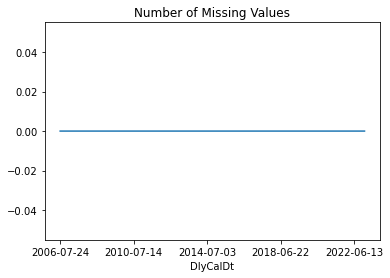

In [13]:
# check for missing data
df_etf_miss = df_etf.isna().sum(axis = 1).plot(title = 'Number of Missing Values') 

# Create some summary statistics for risk parity portfolio
 - statsitics
 - distribution characteristics
 - returns, risk, Sharpe
 - cumulative returns

In [14]:
bs = df_etf.describe()
bs

Ticker,EEM,EFA,EWJ,GSG,IAU,ICF,IOO,IVV,IWM,LQD,SHY,TLT
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,0.000309,0.000230,0.000162,-0.000086,0.000311,0.000409,0.000349,0.000432,0.000413,0.000175,0.000062,0.000201
std,0.018518,0.014235,0.013148,0.015243,0.011180,0.020538,0.012978,0.012671,0.015874,0.005625,0.000881,0.009474
min,-0.161662,-0.111632,-0.104077,-0.120811,-0.088459,-0.217789,-0.108019,-0.115743,-0.132669,-0.091111,-0.006566,-0.066683
25%,-0.008132,-0.005506,-0.006039,-0.007780,-0.005003,-0.006923,-0.004840,-0.004008,-0.007016,-0.002024,-0.000353,-0.005302
50%,0.000904,0.000699,0.000516,0.000580,0.000621,0.000844,0.000770,0.000754,0.001022,0.000423,0.000000,0.000476
75%,0.008794,0.006673,0.006701,0.007976,0.006088,0.007880,0.006245,0.005974,0.008376,0.002546,0.000462,0.005658
max,0.227699,0.158876,0.171817,0.076193,0.116987,0.181701,0.120479,0.110993,0.091491,0.097677,0.007119,0.075196


<AxesSubplot:>

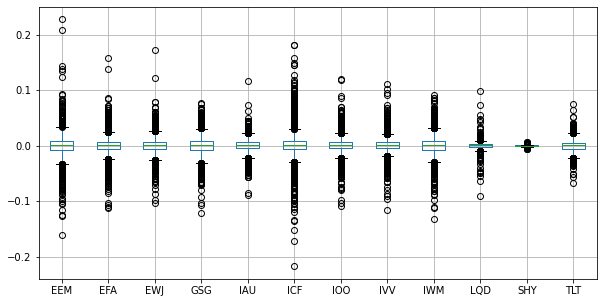

In [15]:
df_etf.boxplot(figsize =(10,5))

In [16]:
# create a function

def calcStats(x):
    # x is a dataframe of daily returns
    ReturnAnn = x.mean()*252
    VolAnn    = x.std()*np.sqrt(252)
    Sharpe    = ReturnAnn/VolAnn
    AnnStats  = pd.DataFrame([ReturnAnn, VolAnn, Sharpe]).T
    AnnStats.columns = ['Return', 'Vol', 'Sharpe']
    return AnnStats

In [17]:
calcStats(df_etf)

,Return,Vol,Sharpe
Ticker,,,
EEM,0.077786,0.293970,0.264607
EFA,0.058021,0.225976,0.256757
EWJ,0.040796,0.208714,0.195466
GSG,-0.021768,0.241982,-0.089958
IAU,0.078366,0.177481,0.441547
ICF,0.103144,0.326035,0.316358
IOO,0.087977,0.206023,0.427025
IVV,0.108864,0.201146,0.541220
IWM,0.104119,0.251992,0.413182


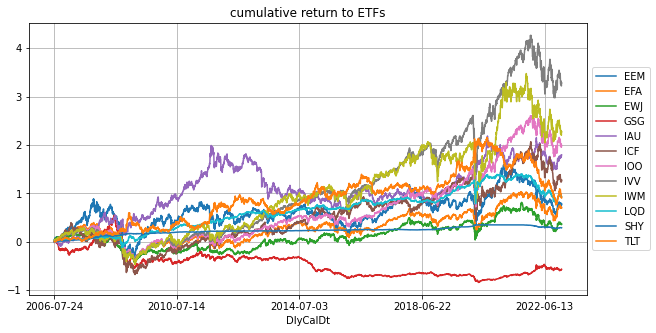

In [18]:
# calculate cumulative returns
df_etf_cumret = (df_etf+1).cumprod()-1
ax = df_etf_cumret.plot(figsize = (10,5))
plt.grid()
plt.title('cumulative return to ETFs')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [19]:
# calculate correlations
etfCorr = df_etf.corr()
etfCorr

Ticker,EEM,EFA,EWJ,GSG,IAU,ICF,IOO,IVV,IWM,LQD,SHY,TLT
Ticker,,,,,,,,,,,,
EEM,1.000000,0.881205,0.757616,0.443944,0.150870,0.665442,0.858912,0.835292,0.776102,0.161495,-0.284079,-0.322591
EFA,0.881205,1.000000,0.862145,0.450904,0.137132,0.687132,0.948484,0.895112,0.826386,0.203663,-0.253535,-0.356037
EWJ,0.757616,0.862145,1.000000,0.338422,0.085515,0.579120,0.803364,0.771917,0.708871,0.195457,-0.190588,-0.258844
GSG,0.443944,0.450904,0.338422,1.000000,0.275000,0.270970,0.439336,0.409684,0.392154,0.066993,-0.132134,-0.256583
IAU,0.150870,0.137132,0.085515,0.275000,1.000000,0.045366,0.092064,0.044180,0.038930,0.145303,0.188456,0.161125
ICF,0.665442,0.687132,0.579120,0.270970,0.045366,1.000000,0.713022,0.757936,0.749571,0.146140,-0.199542,-0.213944
IOO,0.858912,0.948484,0.803364,0.439336,0.092064,0.713022,1.000000,0.963489,0.858971,0.171720,-0.277095,-0.379410
IVV,0.835292,0.895112,0.771917,0.409684,0.044180,0.757936,0.963489,1.000000,0.909573,0.166411,-0.287589,-0.376400
IWM,0.776102,0.826386,0.708871,0.392154,0.038930,0.749571,0.858971,0.909573,1.000000,0.137820,-0.260405,-0.362907


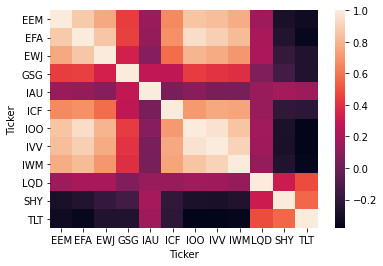

In [20]:
sns.heatmap(etfCorr);

## Create rolling volatility
using the previous rolling 1 year returns


In [21]:
# create a data structure for the data (keep orginal data in df)
df_vol1yr = df_etf.copy() 

In [22]:
volPeriod = 252

for i in df_sym:
    df_vol1yr[i] = df_vol1yr[i].rolling(volPeriod).std() * sqrt(252)


In [23]:

# remove the NAs
idxRmNAs = df_vol1yr.isna().sum(axis=1)
idxRmNAs = idxRmNAs == 0
df_vol1yr = df_vol1yr.loc[idxRmNAs,:]

In [24]:
print(df_vol1yr.head())
print(df_vol1yr.tail())
#df.dropna(inplace=True)  % only want to drop NAs where it makes sense

Ticker           EEM       EFA       EWJ       GSG       IAU       ICF  \
DlyCalDt                                                                 
2007-07-24  0.221146  0.127860  0.138623  0.197887  0.170084  0.192272   
2007-07-25  0.216910  0.126775  0.137416  0.198225  0.169885  0.191786   
2007-07-26  0.222528  0.131339  0.138436  0.198058  0.170616  0.193024   
2007-07-27  0.223149  0.132025  0.138689  0.198130  0.170574  0.195779   
2007-07-30  0.224995  0.132998  0.139015  0.197819  0.169934  0.196678   

Ticker           IOO       IVV       IWM       LQD       SHY       TLT  
DlyCalDt                                                                
2007-07-24  0.109905  0.102245  0.160717  0.040620  0.012360  0.076792  
2007-07-25  0.108931  0.100952  0.157728  0.040624  0.012371  0.076807  
2007-07-26  0.112223  0.103538  0.160267  0.040678  0.012551  0.077166  
2007-07-27  0.113233  0.105625  0.162021  0.040815  0.012540  0.077136  
2007-07-30  0.113508  0.106624  0.162574  0

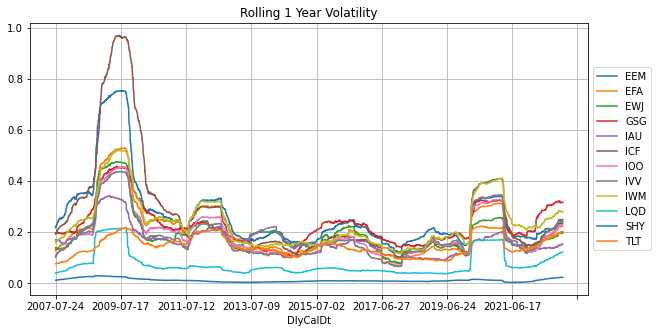

In [25]:

ax = df_vol1yr.plot(figsize = (10,5))
plt.grid()
plt.title('Rolling 1 Year Volatility')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [26]:
#  try different volatility measures: target cvol 10%, 5%, 15%

In [27]:
portfolio_vol = 0.10
target_vol = portfolio_vol/ len(df_sym)
print("Target Vol", target_vol)

Target Vol 0.008333333333333333


 With risk parity, we target a specific level of risk or return and split the risk equally across all asset classes. For this example, we are going to use a 10% annualized volatility target. 

In [28]:
# determine the weights of the portfolio
df_portfolio = target_vol / df_vol1yr 

In [29]:
df_portfolio.head()

Ticker,EEM,EFA,EWJ,GSG,IAU,ICF,IOO,IVV,IWM,LQD,SHY,TLT
DlyCalDt,,,,,,,,,,,,
2007-07-24,0.037683,0.065176,0.060115,0.042112,0.048995,0.043341,0.075823,0.081504,0.051851,0.205155,0.674224,0.108518
2007-07-25,0.038418,0.065733,0.060643,0.042040,0.049053,0.043451,0.076501,0.082548,0.052834,0.205135,0.673639,0.108497
2007-07-26,0.037449,0.063449,0.060196,0.042075,0.048843,0.043172,0.074257,0.080486,0.051996,0.204859,0.663970,0.107992
2007-07-27,0.037344,0.063120,0.060086,0.042060,0.048855,0.042565,0.073595,0.078896,0.051434,0.204173,0.664533,0.108034
2007-07-30,0.037038,0.062657,0.059946,0.042126,0.049039,0.042370,0.073417,0.078156,0.051259,0.204237,0.660323,0.107973


In [30]:
chk_wgts = df_portfolio.sum(axis = 1)


# interesting the weights are sometimes greater or less than 1. 

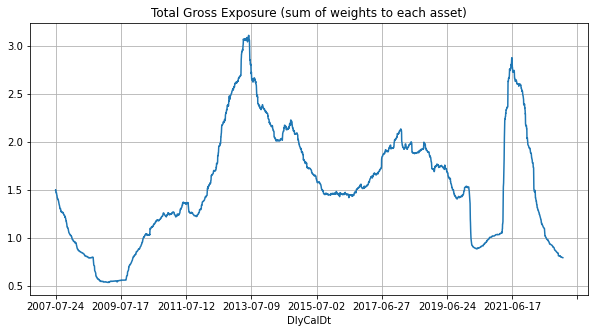

In [31]:
chk_wgts.plot(figsize = (10,5), title = "Total Gross Exposure (sum of weights to each asset)")
plt.grid()

In [32]:
print(df_etf.shape)
print(df_portfolio.shape)
# the difference in the size is related to the dates

#match the sizes
idxMatch = df_etf.index.isin(df_portfolio.index)
df_etf1  = df_etf.loc[idxMatch,:].copy()

(4140, 12)
(3889, 12)


In [33]:
#
# calculate the returns to the portfolio
df_return = df_etf1.copy()

for i in df_sym:
    df_return[i] = df_etf1[i] * df_portfolio[i]

    
# all the portfolio return back to the returns matrix
df_etf1['RiskParityVol1y10p']  =  df_return.sum(axis =1)

In [34]:
# compare the returns
df_etf1 = calcStats(df_etf1)

In [35]:
df_etf1

,Return,Vol,Sharpe
Ticker,,,
EEM,0.049720,0.298116,0.166779
EFA,0.041960,0.230882,0.181740
EWJ,0.033229,0.212439,0.156415
GSG,-0.016912,0.244575,-0.069147
IAU,0.076889,0.177948,0.432087
ICF,0.102603,0.332861,0.308246
IOO,0.076501,0.210758,0.362979
IVV,0.100314,0.205950,0.487078
IWM,0.095186,0.256840,0.370606


In [36]:
# redo the steps above and use target vol=5%
portfolio_vol = 0.05
target_vol = portfolio_vol/ len(df_sym)
print("Target Vol", target_vol)

Target Vol 0.004166666666666667


In [37]:
df_portfolio = target_vol / df_vol1yr

In [38]:
idxMatch = df_etf.index.isin(df_portfolio.index)
df_etf2  = df_etf.loc[idxMatch,:].copy()

In [39]:
df_return = df_etf2.copy()

for i in df_sym:
    df_return[i] = df_etf2[i] * df_portfolio[i]

df_etf2['RiskParityVol1y10p']  =  df_return.sum(axis =1)

In [40]:
df_etf2 = calcStats(df_etf2)
df_etf2

,Return,Vol,Sharpe
Ticker,,,
EEM,0.049720,0.298116,0.166779
EFA,0.041960,0.230882,0.181740
EWJ,0.033229,0.212439,0.156415
GSG,-0.016912,0.244575,-0.069147
IAU,0.076889,0.177948,0.432087
ICF,0.102603,0.332861,0.308246
IOO,0.076501,0.210758,0.362979
IVV,0.100314,0.205950,0.487078
IWM,0.095186,0.256840,0.370606


In [41]:
# redo the steps above and use target vol=15%
portfolio_vol = 0.15
target_vol = portfolio_vol/ len(df_sym)
print("Target Vol", target_vol)

Target Vol 0.012499999999999999


In [42]:
df_portfolio = target_vol / df_vol1yr

In [43]:
idxMatch = df_etf.index.isin(df_portfolio.index)
df_etf3  = df_etf.loc[idxMatch,:].copy()

In [44]:
df_return = df_etf3.copy()

for i in df_sym:
    df_return[i] = df_etf3[i] * df_portfolio[i]

df_etf3['RiskParityVol1y10p']  =  df_return.sum(axis =1)

In [45]:
df_etf3 = calcStats(df_etf3)
df_etf3

,Return,Vol,Sharpe
Ticker,,,
EEM,0.049720,0.298116,0.166779
EFA,0.041960,0.230882,0.181740
EWJ,0.033229,0.212439,0.156415
GSG,-0.016912,0.244575,-0.069147
IAU,0.076889,0.177948,0.432087
ICF,0.102603,0.332861,0.308246
IOO,0.076501,0.210758,0.362979
IVV,0.100314,0.205950,0.487078
IWM,0.095186,0.256840,0.370606


In [46]:
#create a single df and compare return, vol, and sharpe ratios for three portfolios
tv_10 =df_etf1.iloc[12]
tv_5 = df_etf2.iloc[12]
tv_15 = df_etf3.iloc[12]
df_diffvol = pd.concat([tv_10,tv_5,tv_15], join="inner",axis=1, keys=["Target Vol=10%","Target Vol=5%","Target Vol=15%"])
df_diffvol

,Target Vol=10%,Target Vol=5%,Target Vol=15%
Return,0.035486,0.017743,0.053229
Vol,0.062431,0.031216,0.093647
Sharpe,0.568400,0.568400,0.568400


In [47]:
## Classic Min Var Portfolio

In [48]:
#calculate covariance

df_cov = pd.DataFrame(df_etf.cov())
df_cov

Ticker,EEM,EFA,EWJ,GSG,IAU,ICF,IOO,IVV,IWM,LQD,SHY,TLT
Ticker,,,,,,,,,,,,
EEM,0.000343,0.000232,0.000184,0.000125,0.000031,0.000253,0.000206,0.000196,0.000228,0.000017,-4.633443e-06,-0.000057
EFA,0.000232,0.000203,0.000161,0.000098,0.000022,0.000201,0.000175,0.000161,0.000187,0.000016,-3.178795e-06,-0.000048
EWJ,0.000184,0.000161,0.000173,0.000068,0.000013,0.000156,0.000137,0.000129,0.000148,0.000014,-2.207042e-06,-0.000032
GSG,0.000125,0.000098,0.000068,0.000232,0.000047,0.000085,0.000087,0.000079,0.000095,0.000006,-1.774036e-06,-0.000037
IAU,0.000031,0.000022,0.000013,0.000047,0.000125,0.000010,0.000013,0.000006,0.000007,0.000009,1.855777e-06,0.000017
ICF,0.000253,0.000201,0.000156,0.000085,0.000010,0.000422,0.000190,0.000197,0.000244,0.000017,-3.609621e-06,-0.000042
IOO,0.000206,0.000175,0.000137,0.000087,0.000013,0.000190,0.000168,0.000158,0.000177,0.000013,-3.167428e-06,-0.000047
IVV,0.000196,0.000161,0.000129,0.000079,0.000006,0.000197,0.000158,0.000161,0.000183,0.000012,-3.209558e-06,-0.000045
IWM,0.000228,0.000187,0.000148,0.000095,0.000007,0.000244,0.000177,0.000183,0.000252,0.000012,-3.640821e-06,-0.000055


In [49]:
def portfolio_returns(weights):
    return (np.sum(df_etf.mean() * weights)) * 252

In [50]:
def portfolio_sd(weights):
    return np.sqrt(np.transpose(weights) @ (df_etf.cov() * 252) @ weights)

In [51]:
#define the function for calculating weights
def weightofmvp(COV):
    c_1 = np.linalg.inv(COV)
    u_1 = np.array([1,1,1,1,1,1,1,1,1,1,1,1])
    m = np.array(df_etf.mean())
    u = u_1.T
    Upper = np.matmul(u,c_1)
    Lower1 = np.matmul(u,c_1)
    Lower = np.matmul(Lower1,u_1)
    W_mvp = Upper/Lower
    W_mvp_1 = W_mvp.T
    return W_mvp

In [52]:
print("weights are",weightofmvp(df_cov))

weights are [ 1.03916117e-02 -6.88153495e-03 -5.99951569e-04  7.55295146e-04
 -7.17963066e-03  4.82567544e-04 -5.07891846e-03  2.03812142e-02
 -6.45576774e-03 -5.81134638e-03  1.03778462e+00 -3.77881631e-02]


In [53]:
print("portfolio return is",portfolio_returns(weightofmvp(df_cov)))
print("portfolio standard deviation is",portfolio_sd(weightofmvp(df_cov)))


portfolio return is 0.014997495331696004
portfolio standard deviation is 0.011802819809592453


In [54]:
portfolio_sharpe=portfolio_returns(weightofmvp(df_cov))/portfolio_sd(weightofmvp(df_cov))
print("portfolio Sharpe ratio is", portfolio_sharpe)

portfolio Sharpe ratio is 1.2706705324355758


In [55]:
cov_matrix = pd.DataFrame.cov(df_etf)
cov_matrix

Ticker,EEM,EFA,EWJ,GSG,IAU,ICF,IOO,IVV,IWM,LQD,SHY,TLT
Ticker,,,,,,,,,,,,
EEM,0.000343,0.000232,0.000184,0.000125,0.000031,0.000253,0.000206,0.000196,0.000228,0.000017,-4.633443e-06,-0.000057
EFA,0.000232,0.000203,0.000161,0.000098,0.000022,0.000201,0.000175,0.000161,0.000187,0.000016,-3.178795e-06,-0.000048
EWJ,0.000184,0.000161,0.000173,0.000068,0.000013,0.000156,0.000137,0.000129,0.000148,0.000014,-2.207042e-06,-0.000032
GSG,0.000125,0.000098,0.000068,0.000232,0.000047,0.000085,0.000087,0.000079,0.000095,0.000006,-1.774036e-06,-0.000037
IAU,0.000031,0.000022,0.000013,0.000047,0.000125,0.000010,0.000013,0.000006,0.000007,0.000009,1.855777e-06,0.000017
ICF,0.000253,0.000201,0.000156,0.000085,0.000010,0.000422,0.000190,0.000197,0.000244,0.000017,-3.609621e-06,-0.000042
IOO,0.000206,0.000175,0.000137,0.000087,0.000013,0.000190,0.000168,0.000158,0.000177,0.000013,-3.167428e-06,-0.000047
IVV,0.000196,0.000161,0.000129,0.000079,0.000006,0.000197,0.000158,0.000161,0.000183,0.000012,-3.209558e-06,-0.000045
IWM,0.000228,0.000187,0.000148,0.000095,0.000007,0.000244,0.000177,0.000183,0.000252,0.000012,-3.640821e-06,-0.000055


In [56]:
#
returns_annual = df_etf.mean()*252
returns_annual

Ticker
EEM    0.077786
EFA    0.058021
EWJ    0.040796
GSG   -0.021768
IAU    0.078366
ICF    0.103144
IOO    0.087977
IVV    0.108864
IWM    0.104119
LQD    0.044063
SHY    0.015626
TLT    0.050745
dtype: float64

In [57]:
covar_annual = df_etf.cov()*252

In [58]:
def portfolio_risk(weights, returns):
    # calculates portfolio risk (stdev)
    return(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    

In [59]:
def portfolio_returns(weights, returns):
    return(np.sum(returns.mean()*weights)*252)

In [60]:
noa = len( df_etf.columns)

In [61]:
# creates random portfolios from data
prets = []
pvols = []

for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(portfolio_returns(weights, df_etf))  
    pvols.append(portfolio_risk(weights, df_etf))  

prets = np.array(prets)
pvols = np.array(pvols)

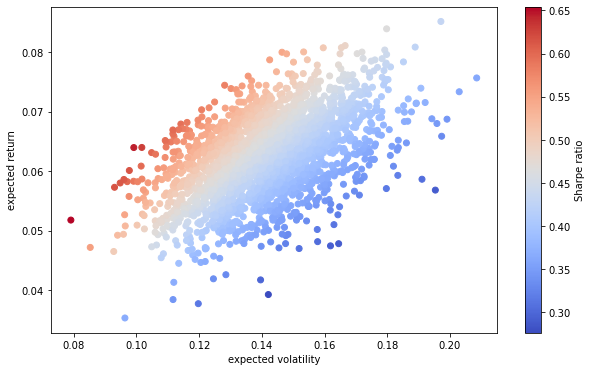

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

In [63]:
def min_func_sharpe(weights):  
             return -port_ret(weights) / port_vol(weights) 

In [64]:
def port_ret(weights):
             return np.sum(rets.mean() * weights) * 252

def port_vol(weights):
             return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


## EXAMPLE 1: Optimization example

In [72]:
# calculation for the optio

def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))



In [73]:
noa = len(df_etf.columns)

In [74]:
# constraints and bounds
cons     = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds     = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1. / noa,])

In [75]:

opts = sco.minimize(portfolio_risk, 
                    eweights,
                    args=(df_etf,),
                    method='SLSQP', 
                    bounds=bnds,
                    constraints=cons)

In [76]:
opts['x'].round(3)

array([0.005, 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.017, 0.   ,
       0.   , 0.976, 0.   ])

In [77]:
rets = df_etf

In [78]:
eweights = np.array(noa * [1. / noa,])

In [79]:
print("return", port_ret(eweights))
print("volatility", port_vol(eweights))

return 0.06231152463768115
volatility 0.13965298988356498


In [80]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [81]:
bnds = tuple((0, 1) for x in range(noa))

In [82]:

#generates the miminum risk portfolio
optv = sco.minimize(port_vol, eweights,
                             method='SLSQP', bounds=bnds,
                             constraints=cons)

In [83]:
pd.DataFrame(optv['x'], index=df_etf.columns ).round(3)

,0
Ticker,
EEM,0.005
EFA,0.000
EWJ,0.000
GSG,0.002
IAU,0.000
ICF,0.000
IOO,0.000
IVV,0.017
IWM,0.000


## EXAMPLE 2: Optimization for efficient frontier

In [84]:
leverage = 2.0    #change the value for leverage

bnds = tuple((0, 1) for x in weights)
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
                 {'type': 'eq', 'fun': lambda x:  np.sum(x) - leverage})
    

In [85]:
# generate the portfolios
#   weights
#     returns
#      volatilities

trets     = np.linspace(0.05, 0.11, 20)  # values for total returns 
tvols     = [] # vector of volatilities
out_wgts  = [] # matrix of weights


for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons) 
    tvols.append(res['fun'])
    out_wgts.append(res['x'].round(3))

    
tvols    = np.array(tvols)
out_wgts = np.array(out_wgts)

In [86]:
# put all the weights 

portfolio_weights = pd.DataFrame(out_wgts, columns = df_etf.columns)
portfolio_weights['total'] = portfolio_weights.sum(axis = 1)
portfolio_weights['vol'] = tvols


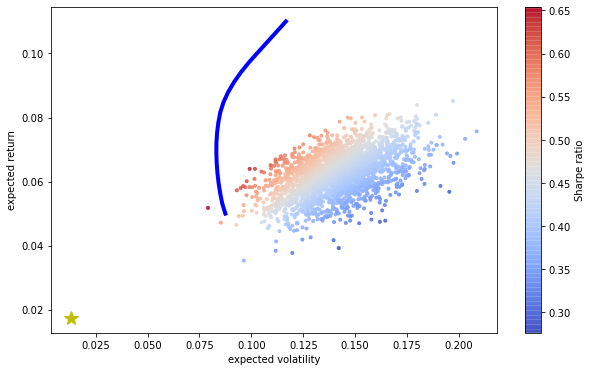

In [87]:
# graph to plot the efficient froniter

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),'y*', markersize=15.0)
#plt.plot(port_vol(optv['x']), port_ret(optv['x']),'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [88]:
portfolio_results = pd.DataFrame([tvols, trets, trets/tvols]).T
portfolio_results.columns = ['vol', 'ret', 'Sharpe']
portfolio_results['leverage'] = portfolio_weights['total']

In [89]:
portfolio_results 

,vol,ret,Sharpe,leverage
0,0.087476,0.050000,0.571588,1.999
1,0.085965,0.053158,0.618368,2.000
2,0.084994,0.056316,0.662585,2.000
3,0.084230,0.059474,0.706085,1.999
4,0.083662,0.062632,0.748626,2.000
5,0.083296,0.065789,0.789830,2.001
6,0.083132,0.068947,0.829369,2.000
7,0.083177,0.072105,0.866890,2.000
8,0.083491,0.075263,0.901455,2.000
9,0.084090,0.078421,0.932584,2.001


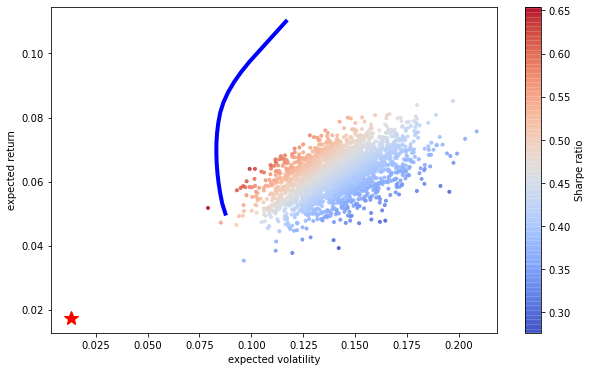

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
                     marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
                  'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
                  'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

# Example 3 Risk Parity with Leverage

In [101]:
def calculate_portfolio_var(W,C):
    # function that calculates portfolio risk
    sigma_p = np.sqrt(np.dot(np.dot(W.T,C),W))
    return sigma_p

def calculate_risk_contribution(W,C):
    MRC = np.dot(C,W)# Marginal Risk 
    RC = np.multiply(W,MRC)# Total Risk 
    return RC

def solve_weight(C,N, leverage): #C is the covariance matrix, and given as sigma_p before
    def risk_budget_objective(W,C,N):
        W           = np.matrix(W).T        
        sig_p       = calculate_portfolio_var(W,C) # portfolio sigma      
        total_RC    = calculate_risk_contribution(W,C)       
        risk_target = sig_p / N
        # sum of squared error
        J = sum(np.square(total_RC / sig_p - risk_target)) *100
        #print("SSE",J[0,0])
        return np.array(J[0,0])

    def total_weight_constraint(x):
        return np.sum(x)-1.0

    #def long_only_constraint(x):
    #    return 
    
    #w0 = [0.1, 0.2, 0.3, 0.4]
    w0 = np.array(N * [1. / N,])
    w0 = np.array(w0)
    
    #print('w0',w0,w0.shape)
    b_ = [(0., 1.) for i in range(N)] 
    c_ = ({'type': 'eq', 'fun': lambda W: np.sum(W) - leverage})
    
    optimized = scipy.optimize.minimize(risk_budget_objective, w0, (C,N), method='SLSQP', constraints=c_, bounds=b_)
    if not optimized.success: raise BaseException(optimized.message)
    
    w_rb = np.asmatrix(optimized.x)
    
    return w_rb

In [110]:
etfCov = df_etf.cov()

In [111]:
etfCov.shape

(12, 12)

In [112]:
wgt_leverage_is_1 = solve_weight(etfCov,12, leverage = 1.0)
wgt_leverage_is_2 = solve_weight(etfCov,12, leverage = 2.0)

In [113]:
print("weights where leverage is 100%")
print(np.array(wgt_leverage_is_1[0]))
print(wgt_leverage_is_1[0].sum())
print("\nweights where leverage is 200%")
print(np.array(wgt_leverage_is_2[0]))
print(wgt_leverage_is_2[0].sum())

weights where leverage is 100%
[[0.03228894 0.0475947  0.04810147 0.03994488 0.12905061 0.03030458
  0.0464626  0.04900738 0.05139371 0.19496115 0.15102169 0.17986828]]
0.9999999999999999

weights where leverage is 200%
[[0.06068911 0.08177927 0.10125056 0.11521615 0.18645427 0.07136865
  0.09897383 0.10130569 0.07392531 0.38611912 0.31866225 0.40425577]]
2.0000000000000004


In [115]:
print(df_etf.columns)

Index(['EEM', 'EFA', 'EWJ', 'GSG', 'IAU', 'ICF', 'IOO', 'IVV', 'IWM', 'LQD',
       'SHY', 'TLT'],
      dtype='object', name='Ticker')


In [120]:
ret_risk_parity_lev_1 = np.array(wgt_leverage_is_1) * df_etf.loc[:,df_sym].values
ret_risk_parity_lev_2 = np.array(wgt_leverage_is_2) * df_etf.loc[:,df_sym].values
ret_equal             =  1/12 * df_etf.values

print(ret_risk_parity_lev_1.shape)
print(ret_risk_parity_lev_2.shape)
print(ret_equal.shape)

ret_risk_parity_lev_1   = ret_risk_parity_lev_1.sum(axis = 1)
ret_risk_parity_lev_2   = ret_risk_parity_lev_2.sum(axis = 1)
ret_equal               = ret_equal.sum(axis = 1)

(4140, 12)
(4140, 12)
(4140, 12)


In [121]:
ret_compare = pd.DataFrame([ret_risk_parity_lev_1,ret_risk_parity_lev_2, ret_equal]).T
ret_compare = ret_compare.set_index(df_etf.index)
ret_compare.columns = ['risk parity @ leverage 1', 'risk parity @ leverage 2', 'equal weighted']
ret_compare.index = pd.to_datetime(ret_compare.index)
df_etf.index = pd.to_datetime(df_etf.index)

In [129]:
ret_all = pd.merge(df_etf, ret_compare, left_index=True, right_index=True)
ret_all.cumsum().to_csv(pathName + 'returnAll_test.csv')

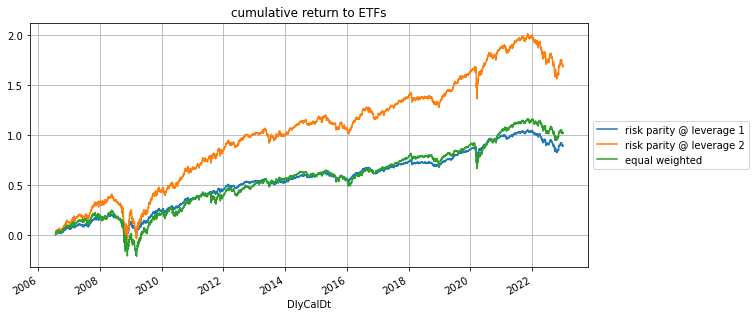

In [130]:

ax = ret_compare.cumsum().plot(figsize = (10,5))
plt.grid()
plt.title('cumulative return to ETFs')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [131]:
period = 252

df_compare_vol1yr = ret_compare.copy()
df_compare_ret1yr = ret_compare.copy()

for i in ret_compare.columns:
    print(i)
    df_compare_vol1yr[i] = ret_compare[i].rolling(period).std() * sqrt(252)
    df_compare_ret1yr[i] = ret_compare[i].rolling(period).mean() * 252

risk parity @ leverage 1
risk parity @ leverage 2
equal weighted


Text(0.5, 1.0, 'Rolling 1 year volatility')

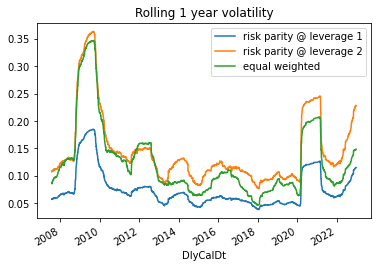

In [132]:
df_compare_vol1yr.plot()
plt.title("Rolling 1 year volatility")

In [134]:
calcStats(ret_all)

,Return,Vol,Sharpe
EEM,0.077786,0.293970,0.264607
EFA,0.058021,0.225976,0.256757
EWJ,0.040796,0.208714,0.195466
GSG,-0.021768,0.241982,-0.089958
IAU,0.078366,0.177481,0.441547
ICF,0.103144,0.326035,0.316358
IOO,0.087977,0.206023,0.427025
IVV,0.108864,0.201146,0.541220
IWM,0.104119,0.251992,0.413182
LQD,0.044063,0.089287,0.493493
